In [1]:
%matplotlib notebook

In [2]:
#Does price affect rating
# h0 = price has no affect on rating
from scipy import stats
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yelpapi import YelpAPI
from yelp.client import Client
from config import api_key

In [3]:
#API Call
my_api_key = api_key
client = YelpAPI(my_api_key)

In [4]:
#pulling data from yelp
yelp_min = []

for i in range(0, 1000):
    response = client.search_query(location="St. Louis", limit=1, offset=i)
    yelp_min.append(response["businesses"][0])

In [5]:
len(yelp_min)

1000

In [7]:
df = pd.DataFrame.from_dict(yelp_min)
df.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,pappys-smokehouse-saint-louis-3,"[{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...","{'latitude': 38.635146597249, 'longitude': -90...",(314) 535-4340,8826.947371,I_3LMZ_1m2mzR0oLIOePIg,https://s3-media2.fl.yelpcdn.com/bphoto/ZQWKBz...,False,"{'address1': '3106 Olive St', 'address2': '', ...",Pappy's Smokehouse,+13145354340,$$,4.5,3228,[],https://www.yelp.com/biz/pappys-smokehouse-sai...
1,blues-city-deli-saint-louis,"[{'alias': 'delis', 'title': 'Delis'}]","{'latitude': 38.605057, 'longitude': -90.2184098}",(314) 773-8225,8981.695407,_aKr7POnacW_VizRKBpCiA,https://s3-media4.fl.yelpcdn.com/bphoto/7WS4yV...,False,"{'address1': '2438 McNair Ave', 'address2': No...",Blues City Deli,+13147738225,$,5.0,783,[],https://www.yelp.com/biz/blues-city-deli-saint...
2,the-shaved-duck-saint-louis-3,"[{'alias': 'soulfood', 'title': 'Soul Food'}, ...","{'latitude': 38.603635, 'longitude': -90.235876}",(314) 776-1407,7490.599223,cQIh4YJlVtZI9TLF5_smOg,https://s3-media1.fl.yelpcdn.com/bphoto/ZW59pg...,False,"{'address1': '2900 Virginia Ave', 'address2': ...",The Shaved Duck,+13147761407,$$,4.5,1459,[],https://www.yelp.com/biz/the-shaved-duck-saint...
3,broadway-oyster-bar-saint-louis,"[{'alias': 'cajun', 'title': 'Cajun/Creole'}, ...","{'latitude': 38.618778, 'longitude': -90.192384}",(314) 621-8811,11227.286845,iRIHK8-EwpeffwvoO4nzIA,https://s3-media3.fl.yelpcdn.com/bphoto/Wz45Fi...,False,"{'address1': '736 S Broadway', 'address2': '',...",Broadway Oyster Bar,+13146218811,$$,4.5,1323,"[pickup, delivery]",https://www.yelp.com/biz/broadway-oyster-bar-s...
4,sugarfire-smoke-house-saint-louis-2,"[{'alias': 'bbq', 'title': 'Barbeque'}]","{'latitude': 38.673459, 'longitude': -90.367448}",(314) 997-2301,7882.156789,vWjME92WddneF98IqzaNfQ,https://s3-media4.fl.yelpcdn.com/bphoto/nP38lv...,False,"{'address1': '9200 Olive Blvd', 'address2': 'S...",Sugarfire Smoke House,+13149972301,$$,4.5,1225,[delivery],https://www.yelp.com/biz/sugarfire-smoke-house...


In [8]:
#parsing data for graph
graph_data = df[["price", "rating"]]
graph_data.head()

,price,rating
0,$$,4.5
1,$,5.0
2,$$,4.5
3,$$,4.5
4,$$,4.5


In [10]:
#Cleaning parse
graph_data.count()
graph_data_clean = graph_data.dropna(how='any')
graph_data_clean.count()

price     960
rating    960
dtype: int64

In [11]:
graph_data_clean["price"].astype(str)

0       $$
1        $
2       $$
3       $$
4       $$
5        $
7       $$
8       $$
9       $$
10       $
11      $$
12      $$
13      $$
14      $$
15      $$
16      $$
17      $$
18      $$
19       $
20      $$
21      $$
22      $$
23      $$
24      $$
25       $
26       $
27       $
28      $$
29     $$$
30       $
      ... 
967      $
968     $$
970     $$
972      $
973      $
974     $$
975     $$
976      $
977      $
978      $
979      $
980      $
981      $
982      $
983     $$
984      $
985     $$
986     $$
988      $
989      $
990      $
991      $
992      $
993      $
994      $
995      $
996      $
997      $
998      $
999      $
Name: price, Length: 960, dtype: object

In [12]:
graph_data_clean['price_length'] = graph_data_clean['price'].apply(len)
graph_data_clean

C:\Users\titus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,price,rating,price_length
0,$$,4.5,2
1,$,5.0,1
2,$$,4.5,2
3,$$,4.5,2
4,$$,4.5,2
5,$,4.5,1
7,$$,4.5,2
8,$$,4.5,2
9,$$,4.5,2
10,$,4.5,1


In [13]:
new_df = graph_data_clean[['price_length', 'rating']]
new_df = new_df.rename(index=str, columns={"price_length": "price"})

<IPython.core.display.Javascript object>


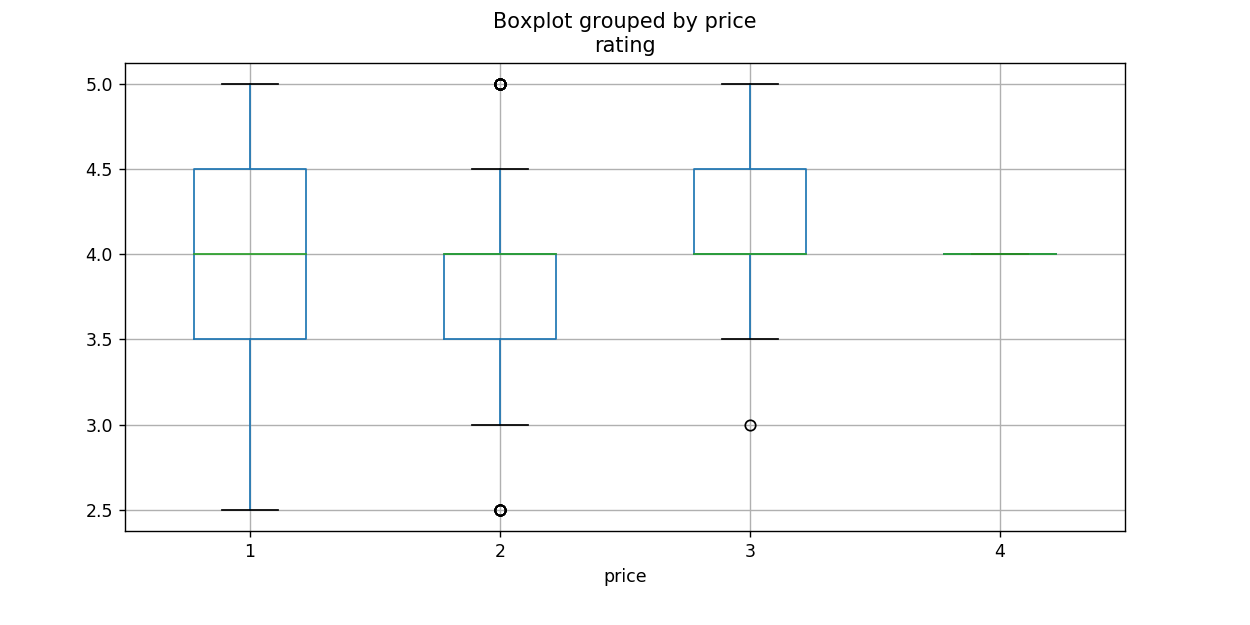

In [14]:
new_df.boxplot("rating", by="price", figsize=(10, 5))

In [15]:
group1 = new_df[new_df["price"] == 1]["rating"]
group2 = new_df[new_df["price"] == 2]["rating"]
group3 = new_df[new_df["price"] == 3]["rating"]
group4 = new_df[new_df["price"] == 4]["rating"]

stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=8.71055680049366, pvalue=1.0531307945525159e-05)

In [16]:
price_counts = new_df["price"].value_counts()
price_counts

2    555
1    358
3     44
4      3
Name: price, dtype: int64

In [17]:
four_star = new_df[new_df['price']==4]
four_star.head()

,price,rating
270,4,4.0
340,4,4.0
595,4,4.0


<IPython.core.display.Javascript object>


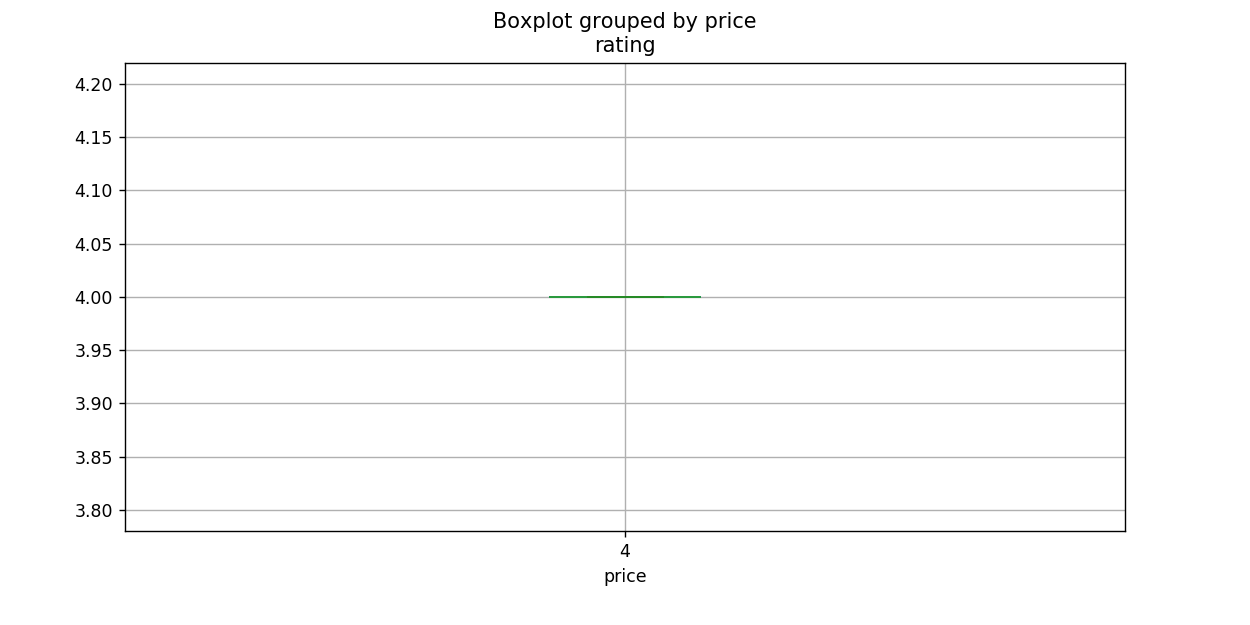

In [18]:
four_star.boxplot("rating", by="price", figsize=(10, 5))

<IPython.core.display.Javascript object>


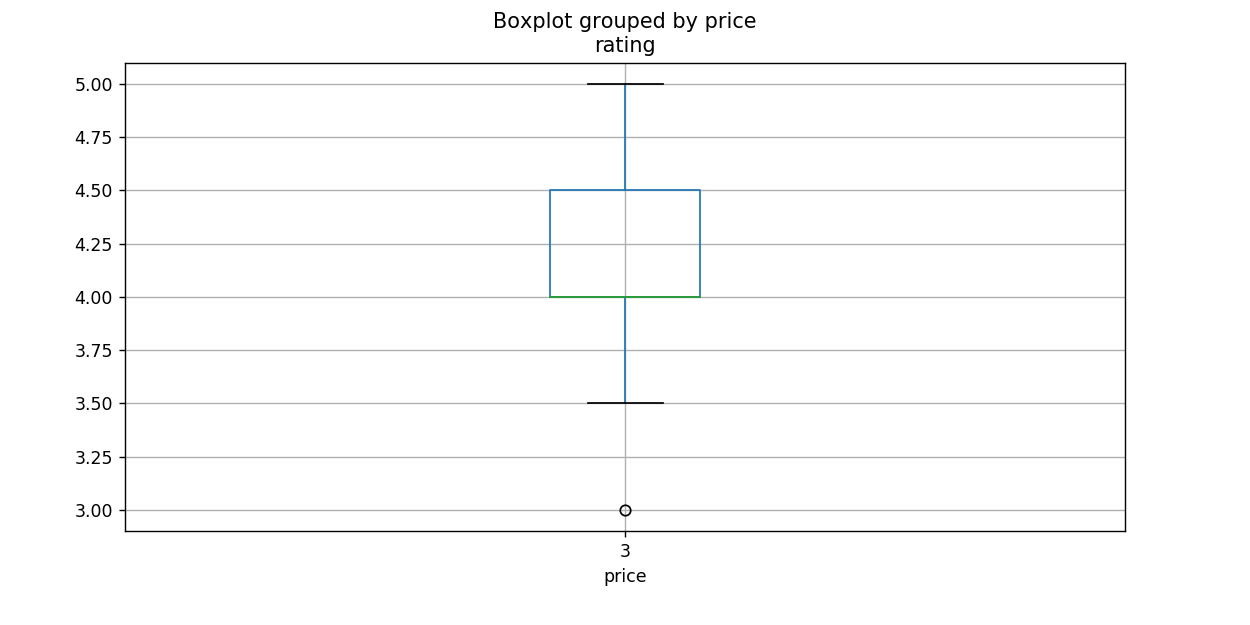

In [19]:
three_star = new_df[new_df['price']==3]
three_star.boxplot("rating", by="price", figsize=(10, 5))

<IPython.core.display.Javascript object>


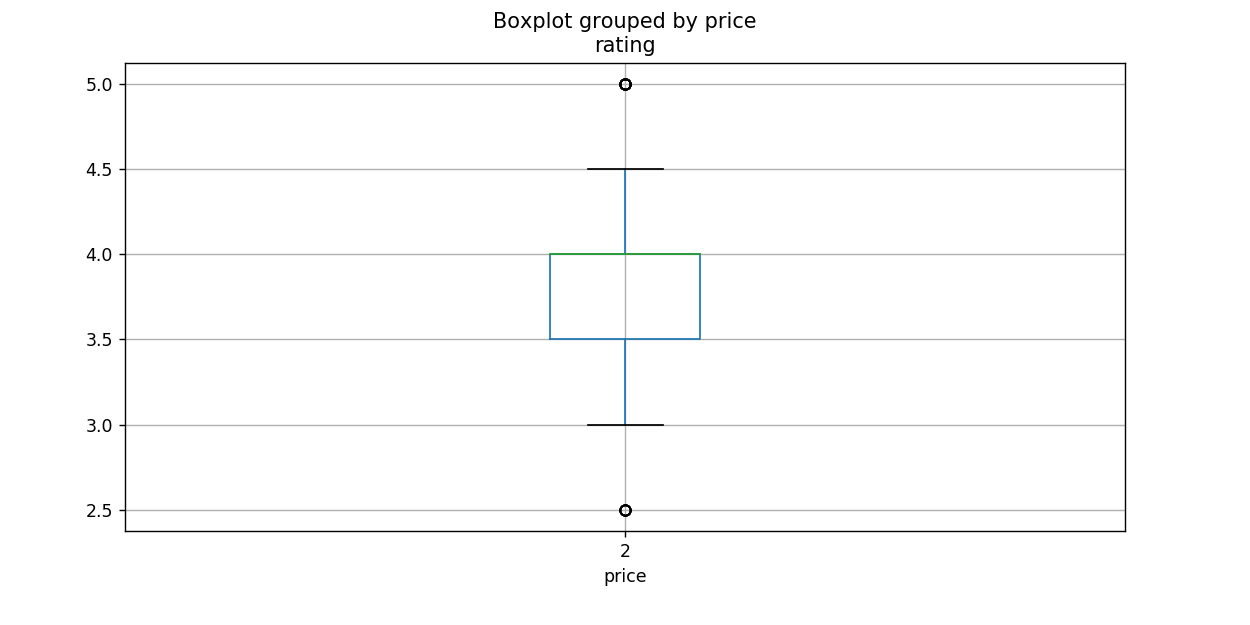

In [20]:
two_star = new_df[new_df['price']==2]
two_star.boxplot("rating", by="price", figsize=(10, 5))

<IPython.core.display.Javascript object>


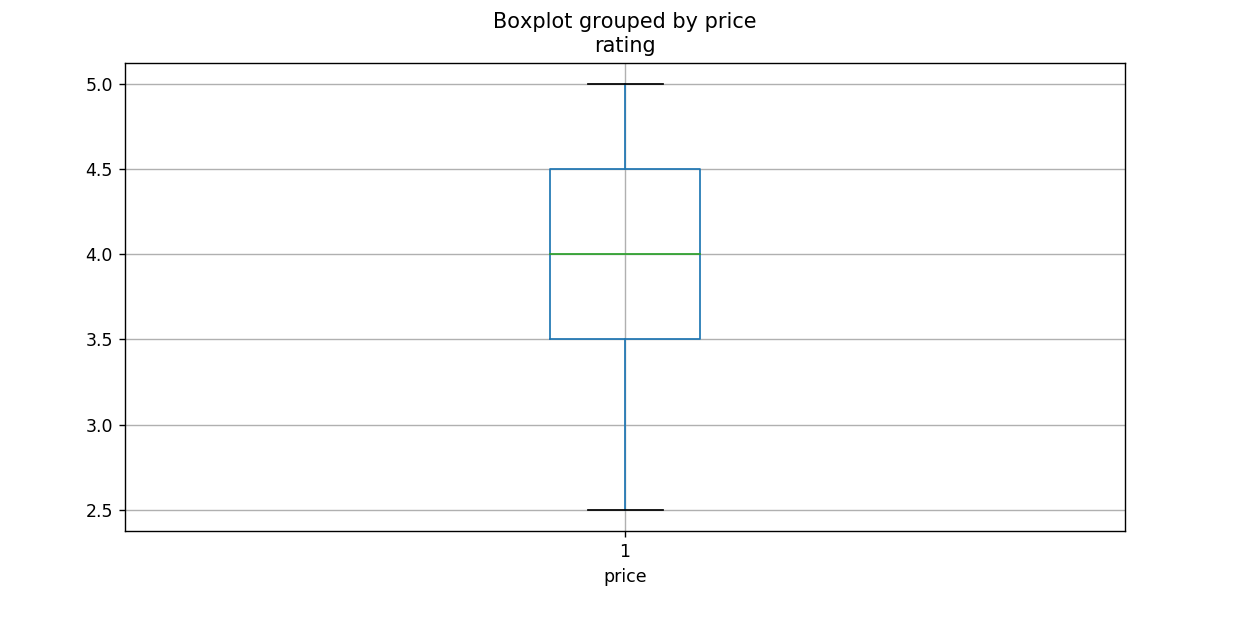

In [21]:
one_star = new_df[new_df['price']==1]
one_star.boxplot("rating", by="price", figsize=(10, 5))